In [4]:
%load_ext Cython

In [21]:
%%cython
# Basic cython class for calculating multiplication of two arrays.
#     
#             : This codes uses OpenMP multithreading
#             : also it employs the concept of memory views 
#


import  numpy as np
cimport numpy as np
cimport cython
from libc.math cimport sqrt
from cython.parallel import prange

DTYPE   = np.float
ctypedef np.float_t DTYPE_t

@cython.wraparound(False)
@cython.boundscheck(False)
@cython.cdivision(True)
@cython.nonecheck(False)
cdef class cythontest:
    cdef readonly np.ndarray A, B, C 
    cdef readonly int N
       
    def __init__(self, N):
        self.N = N
        self.C = np.empty(N, dtype=DTYPE)
    
    @cython.cdivision(True)
    cpdef calcC(self, np.ndarray A, np.ndarray B, int iter):
        cdef int N = self.N
        cdef double [:] t1   = A 
        cdef double [:] t2   = B
        print -128%128  
            
        cdef double [:] F   = self.C
        cdef int i, j 
       
        for i in prange(N, nogil=True):
            for j in range(iter):            
                F[i] = t1[i] * t2[i]                 
        return 

In [ ]:
N = 6000    # size of the array
p = 1000    # number of iterations 

A = np.linspace(-10,10, N)
B = np.linspace(-10,10, N)
C = np.zeros(np.size(A))

In [ ]:
%%timeit
for j in range(N):
    for tn in range(p):
        C[j] = A[j]*B[j] 

In [ ]:
rm = cythontest(N)
rm.calcC(A, B, p)
np.allclose(C, rm.C)

In [ ]:
%%timeit
rm = cythontest(N)
rm.calcC(A, B, p)
np.allclose(C, rm.C)

In [14]:
import numpy as np
np.random.standard_cauchy()

-1.7217508452829056

In [13]:
help(np.random.exponential)

Help on built-in function exponential:

exponential(...)
    exponential(scale=1.0, size=None)
    
    Draw samples from an exponential distribution.
    
    Its probability density function is
    
    .. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),
    
    for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
    which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
    The rate parameter is an alternative, widely used parameterization
    of the exponential distribution [3]_.
    
    The exponential distribution is a continuous analogue of the
    geometric distribution.  It describes many common situations, such as
    the size of raindrops measured over many rainstorms [1]_, or the time
    between page requests to Wikipedia [2]_.
    
    Parameters
    ----------
    scale : float
        The scale parameter, :math:`\beta = 1/\lambda`.
    size : int or tuple of ints, optional
        Output shape.  If the given shape 

246

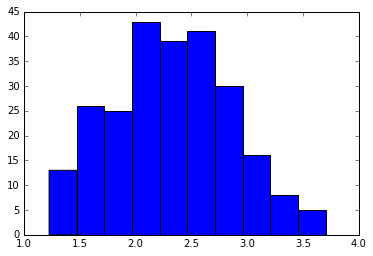

In [105]:
tm = 2.269
import numpy as np
tm = 2.269; T=np.random.normal(tm, .6, 256)
T = T[(T>1.2) & (T<3.8)];   nt = np.size(T)
plt.hist(T);
nt

In [110]:
2**8

256